<a href="https://colab.research.google.com/github/mohmaed7777/Novozymes-Enzyme-Stability-Prediction/blob/main/Novozymes_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c novozymes-enzyme-stability-prediction

 99% 7.00M/7.06M [00:01<00:00, 8.95MB/s]
100% 7.06M/7.06M [00:01<00:00, 5.59MB/s]


In [7]:
! unzip /content/novozymes-enzyme-stability-prediction.zip

Archive:  /content/novozymes-enzyme-stability-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
  inflating: train_updates_20220929.csv  
  inflating: wildtype_structure_prediction_af2.pdb  


In [8]:
import pandas as pd
import numpy as np 

In [9]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
sumbmissions = pd.read_csv('/content/sample_submission.csv')

In [10]:
df_train.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [11]:
df_train.shape

(31390, 5)

In [12]:
df_test.head()

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [13]:
df_test.shape

(2413, 4)

In [14]:
df_train.isnull().sum()

seq_id                 0
protein_sequence       0
pH                   286
data_source         3347
tm                     0
dtype: int64

In [15]:
df_test.isnull().sum()

seq_id              0
protein_sequence    0
pH                  0
data_source         0
dtype: int64

In [16]:
df_train.dtypes

seq_id                int64
protein_sequence     object
pH                  float64
data_source          object
tm                  float64
dtype: object

In [17]:
df_train['data_source'].value_counts()

doi.org/10.1038/s41592-020-0801-4    24525
10.1021/acscatal.9b05223               211
10.1016/j.bpc.2006.10.014              185
10.7554/eLife.54639                    151
10.1007/s00253-018-8872-1               84
                                     ...  
10.1074/jbc.M001132200                   1
10.1021/bi9530090                        1
10.1016/j.ijbiomac.2008.12.016           1
10.1016/j.jmb.2004.02.073                1
10.1021/bi00219a037                      1
Name: data_source, Length: 324, dtype: int64

In [18]:
df_updated = pd.read_csv('/content/train_updates_20220929.csv')
df_updated

,seq_id,protein_sequence,pH,data_source,tm
0,69,NaN,NaN,NaN,NaN
1,70,NaN,NaN,NaN,NaN
2,71,NaN,NaN,NaN,NaN
3,72,NaN,NaN,NaN,NaN
4,73,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2429,30738,NaN,NaN,NaN,NaN
2430,30739,NaN,NaN,NaN,NaN
2431,30740,NaN,NaN,NaN,NaN
2432,30741,NaN,NaN,NaN,NaN


In [19]:
df_train.describe(include='object')

,protein_sequence,data_source
count,31390,28043
unique,28981,324
top,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...,doi.org/10.1038/s41592-020-0801-4
freq,14,24525


In [20]:
df_train.describe()

,seq_id,pH,tm
count,31390.000000,31104.000000,31390.000000
mean,15694.500000,6.892339,49.147337
std,9061.656811,1.612225,14.010089
min,0.000000,1.990000,-1.000000
25%,7847.250000,7.000000,42.100000
50%,15694.500000,7.000000,48.000000
75%,23541.750000,7.000000,53.800000
max,31389.000000,64.900000,130.000000


In [21]:
df_train.shape

(31390, 5)

In [22]:
df_test.shape

(2413, 4)

In [23]:
df_train['pH'].mode()

0    7.0
dtype: float64

In [24]:
df_train['pH'].describe()

count    31104.000000
mean         6.892339
std          1.612225
min          1.990000
25%          7.000000
50%          7.000000
75%          7.000000
max         64.900000
Name: pH, dtype: float64

# **ProtBert Embedding EDA:=**

In [25]:
! pip download transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 2.5 MB/s 
     |████████████████████████████████| 701 kB 17.1 MB/s 
     |████████████████████████████████| 40 kB 5.9 MB/s 
     |████████████████████████████████| 17.1 MB 63.2 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 772 kB 50.0 MB/s 
     |████████████████████████████████| 7.6 MB 56.4 MB/s 
     |████████████████████████████████| 182 kB 30.3 MB/s 
     |████████████████████████████████| 98 kB 5.5 MB/s 
     |████████████████████████████████| 161 kB 61.9 MB/s 
     |████████████████████████████████| 61 kB 56 kB/s 
     |████████████████████████████████| 140 kB 71.9 MB/s 
Saved ./transformers-4.25.1-py3-none-any.whl
Saved ./huggingface_hub-0.11.1-py3-none-any.whl
Saved ./numpy-1.23.5-cp38-cp38-manylinux_2_17_x86_64.manylinux201

In [26]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.25.1-py3-none-any.whl (5.8 MB)
  Using cached huggingface_hub-0.11.1-py3-none-any.whl (182 kB)
  Using cached tokenizers-0.13.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.6 MB)


In [27]:
! pip download datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 33.3 MB/s 
  File was already downloaded /content/numpy-1.23.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
     |████████████████████████████████| 132 kB 76.7 MB/s 
     |████████████████████████████████| 110 kB 68.0 MB/s 
     |████████████████████████████████| 139 kB 36.2 MB/s 
     |████████████████████████████████| 1.0 MB 10.2 MB/s 
  File was already downloaded /content/huggingface_hub-0.11.1-py3-none-any.whl
     |████████████████████████████████| 12.2 MB 47.1 MB/s 
  File was already downloaded /content/packaging-21.3-py3-none-any.whl
  File was already downloaded /content/PyYAML-6.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl
     |████████████████████████████████| 212 kB 12.2 MB/s 
  File was already downloaded /content/requests-2.28.1-py3-none-any.whl
     |███████████

In [28]:
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached datasets-2.7.1-py3-none-any.whl (451 kB)
  Using cached multiprocess-0.70.14-py38-none-any.whl (132 kB)
  Using cached responses-0.18.0-py3-none-any.whl (38 kB)
  Using cached xxhash-3.1.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (212 kB)
     |████████████████████████████████| 127 kB 31.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [29]:
#! pip download umap

In [30]:
#!pip install umap

In [31]:
#!pip uninstall umap

In [32]:
!pip3 install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 6.9 MB/s 
     |████████████████████████████████| 1.1 MB 64.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=ca28ce310c14566e5a51871b07c02ed56b3f85ef638871d5e5276894b81d8810
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=0ef9b1fdb98ae91c6199234386c97a40acdb4f42bf286f4dc59ab382ae92d597
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [33]:
! pip download biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 19.7 MB/s 
  File was already downloaded /content/numpy-1.23.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Saved ./biopython-1.80-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Successfully downloaded biopython numpy


In [34]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached biopython-1.80-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)


In [35]:
# data check : 
from collections import Counter

# transformers: 
import torch
from transformers import BertModel, BertTokenizer
import datasets

# analysis :
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import umap
from sklearn.preprocessing import MinMaxScaler

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# use biopython to extract protein properties
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# util
from tqdm import tqdm
print('here we go!!!!')

here we go!!!!


# **Load the Model:=**

In [36]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [37]:
device

device(type='cuda')

In [38]:
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = BertModel.from_pretrained("Rostlab/prot_bert").to(device)

Downloading:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/361 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

Some weights of the model checkpoint at Rostlab/prot_bert were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [39]:
# load the data : 
train = pd.read_csv('/content/train.csv')
train_update = pd.read_csv('/content/train_updates_20220929.csv')
train_update = train_update.drop('data_source', axis=1)
test = pd.read_csv('/content/test.csv')

In [41]:
# data correct : 
train_drop_id = train_update[train_update.isnull().all('columns')].index
train_swap_id = train_update[train_update.notnull().all('columns')].index

train = train.drop(train.index[train_drop_id], axis=0)
train.loc[train_swap_id, ['pH', 'tm']] = train_update.loc[train_swap_id, ['pH', 'tm']]
train = train.reset_index(drop=True)

In [44]:
# Add Sequence length to check input length: 

train['seq_length'] = [len(s) for s in train['protein_sequence']]
print(f"MIN :{train['seq_length'].min()}\nMAX :{train['seq_length'].max()}\n\
MEAN :{train['seq_length'].mean()}\nMEDIAN :{train['seq_length'].median()}")

MIN :5
MAX :32767
MEAN :447.66951258362536
MEDIAN :336.0


In [45]:
# drop too long sequences : 
# check the length in 90% quantile
# Drop records those have length over 90%
# Save GPU memory 
train['seq_length'].quantile(0.90)

838.0

In [47]:
import seaborn as sns
from umap import UMAP

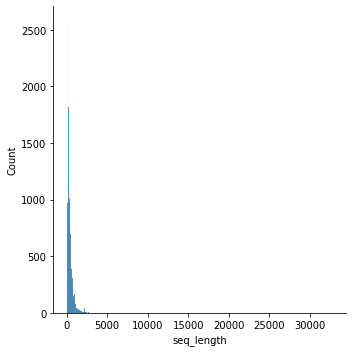

In [48]:
sns.displot(train['seq_length'])

In [49]:
# drop too long sequnces: 
train_long_id = train[train['seq_length'] > 838].index
train = train.drop(train.index[train_long_id], axis=0)
train = train.reset_index(drop=True)

In [50]:
train.head()

,seq_id,protein_sequence,pH,data_source,tm,seq_length
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,341
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,286
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,497
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,265
4,5,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4,380


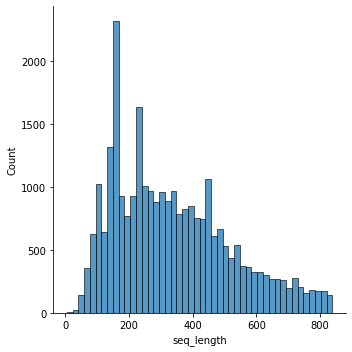

In [51]:
sns.displot(train['seq_length'])

# **Test Prot_bert:=**

In [52]:
# Tokenize sequnces : 
# The tokenizer of prot_bert only accept white space splitted sequnces : 
# Berfore input a sequnces, we need to process it
# make a test by a single sequnces: 
sequence_example = train['protein_sequence'][0]
sequence_example = ' '.join(list(sequence_example))
encodeed_input = tokenizer(sequence_example, return_tensors='pt').to(device)
output = model(**encodeed_input)

In [54]:
display(output)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.1146,  0.1486,  0.1356,  ...,  0.0493, -0.0820, -0.1194],
         [ 0.1352,  0.1484,  0.0514,  ..., -0.0149,  0.0302, -0.1391],
         [ 0.0785,  0.0523,  0.0570,  ..., -0.0075, -0.1970, -0.0287],
         ...,
         [ 0.0374, -0.0489, -0.0162,  ...,  0.0537, -0.0286, -0.0545],
         [ 0.0616, -0.0104,  0.0208,  ..., -0.0674, -0.1053, -0.1227],
         [ 0.2170,  0.0860,  0.1005,  ..., -0.0259, -0.0758, -0.1521]]],
       device='cuda:0', grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-0.2569,  0.2712, -0.2446,  ...,  0.2586,  0.2418, -0.2640]],
       device='cuda:0', grad_fn=<TanhBackward0>), hidden_states=None, past_key_values=None, attentions=None, cross_attentions=None)

In [58]:
encodeed_input['input_ids'].shape

torch.Size([1, 343])

In [59]:
output['last_hidden_state'].shape

torch.Size([1, 343, 1024])